In [12]:
#get essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
#get preprocessing and metric libraries
import sklearn.metrics as sk_metrics
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
#get the model and visualisation method
from nodegam.sklearn import NodeGAMClassifier
from nodegam.vis_utils import vis_GAM_effects
import seaborn as sns
%store -r age_data
%store -r sex_data
%store -r diabetic_data


In [2]:
#get the data
heart_data = pd.read_csv('../../Data/Heart/heart_2020_cleaned.csv')

In [53]:
heart_data['Diabetic'].value_counts()

No                         41132
Yes                        11907
No, borderline diabetes     1371
Yes (during pregnancy)       336
Name: Diabetic, dtype: int64

In [4]:
#Undersample the data because of class imbalance
print("size of data before sampling", heart_data.shape)
sick = heart_data[heart_data['HeartDisease'] == 'Yes']
healthy = heart_data[heart_data['HeartDisease'] == 'No']
healthy = healthy.sample(n = len(sick), random_state = 1024)
print("ratio of sick people ", len(sick) / (len(healthy) + len(sick)))

combine = [sick, healthy]
heart_data = pd.concat(combine, axis = 0)
print("size of data after sampling ", heart_data.shape)

#split the data and encode target catecorigal variables
target_heart = heart_data['HeartDisease']
encoder = preproc.LabelEncoder()
target_heart = encoder.fit_transform(target_heart)
train_heart = heart_data.drop(['HeartDisease', 'GenHealth'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(train_heart, target_heart, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = (0.15 /(0.15 + 0.7)))


size of data before sampling (319795, 18)
ratio of sick people  0.5
size of data after sampling  (54746, 18)


In [37]:
train_heart['Diabetic'].unique()

array(['No', 'Yes', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [5]:
#create a list of column names into three categories: numerical data, 
#catecorigal data with two unique vals, and catecorigal data with more than 2 values

#this is for the column transofrmer. We will use different preprocessing methods depending on
#the features data type

numerical_cols = []
categorical_cols = []

for c in X_train.columns:
    if X_train[c].dtype == X_train['BMI'].dtype:
        numerical_cols.append(c)
    else:
        categorical_cols.append(c)

col_names = numerical_cols + categorical_cols    

In [6]:
#create the columntransformer object and set the preprocessing methods for each column
ct = ColumnTransformer([
    ("MinMax scaling numerical variables", preproc.MinMaxScaler((-1, 1)), numerical_cols),
    ("Encoding catecorigal variables", preproc.OrdinalEncoder(), categorical_cols)
])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [7]:
X_train = pd.DataFrame(data = X_train, columns = col_names)
X_test = pd.DataFrame(data = X_test, columns = col_names)

In [8]:
#create and fit the model
NodeClass = NodeGAMClassifier(
                ga2m=0,
                in_features=16,
                device='cpu',
                max_steps=2800,
                verbose=True
            )
NodeClass.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/qhoptim/pyt/qhadam.py:133: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1485.)
  exp_avg.mul_(beta1_adj).add_(1.0 - beta1_adj, d_p)


Steps	Train Err	Val Metric (ce_loss)
100	0.5675	0.5305
200	0.5701	0.5539
300	0.4829	0.5505
400	0.5327	0.545
500	0.4753	0.5511
600	0.4976	0.5756
700	0.5081	0.5563
800	0.4822	0.5689
900	0.5375	0.5577
1000	0.4989	0.5509
1100	0.5046	0.5365
1200	0.4971	0.5387
1300	0.5034	0.5439
1400	0.5285	0.5251
1500	0.5111	0.5165
1600	0.5078	0.5138
1700	0.5313	0.5123
1800	0.5309	0.5106
1900	0.5031	0.5101
2000	0.5088	0.5084
2100	0.5219	0.508
2200	0.5077	0.5079
2300	0.4966	0.508
2400	0.51	0.5079
2500	0.4797	0.5081
LR: 1.00e-02 -> 2.00e-03
2600	0.523	0.5082
2700	0.5219	0.5086
2800	0.4871	0.5084
End. It reaches the maximum steps 2800
Total training time: 617.2 seconds
Best step:  2200
Best Val Metric:  0.5078691840171814
Load the best checkpoint.


{'train_losses': [0.7255896329879761,
  0.7514217495918274,
  0.7180857062339783,
  0.699674129486084,
  0.6702848672866821,
  0.6958245038986206,
  0.7030315399169922,
  0.6783748269081116,
  0.6469924449920654,
  0.6645091772079468,
  0.7175024151802063,
  0.6554320454597473,
  0.6673676371574402,
  0.6404668688774109,
  0.6681451797485352,
  0.687452495098114,
  0.6439837217330933,
  0.703464686870575,
  0.6308403015136719,
  0.6273349523544312,
  0.6349498629570007,
  0.6211835741996765,
  0.6247051954269409,
  0.6070745587348938,
  0.6540522575378418,
  0.5959833264350891,
  0.6279111504554749,
  0.6913236379623413,
  0.586523711681366,
  0.5985696911811829,
  0.6615598201751709,
  0.5682817697525024,
  0.5647189617156982,
  0.5658602714538574,
  0.5697680711746216,
  0.5703182816505432,
  0.5665226578712463,
  0.5927598476409912,
  0.5973963737487793,
  0.5756531953811646,
  0.56927090883255,
  0.5910937786102295,
  0.5390898585319519,
  0.5408782362937927,
  0.5287140607833862,


In [72]:
#evaluate the model
predictions = NodeClass.predict_proba(X_test)
precision, recall, _ = sk_metrics.precision_recall_curve(y_test, predictions[:, 1])
print("auc score is ", sk_metrics.auc(recall, precision))

auc score is  0.8077621927404465


In [10]:
scoring_metrics = ['roc_auc']
r = permutation_importance(NodeClass, X_test, y_test, n_repeats=10, scoring=scoring_metrics, random_state=45)

ValueError: NodeGAMClassifier should either be a classifier to be used with response_method=decision_function or the response_method should be 'predict'. Got a regressor with response_method=decision_function instead.

bin features BMI with uniq val 2432 to only 256


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:154: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col_name] = pd.Series(bins)[digitized].values.astype(np.float32)


Finish "Run values through model" in 1.5s


100%|██████████| 16/16 [00:00<00:00, 470.81it/s]


Finish "Extract values" in 56ms
Finish "Purify interactions to main effects" in 0ms
Finish "Center main effects" in 1ms


100%|██████████| 17/17 [00:00<00:00, 15595.62it/s]

Finish "Construct table" in 5ms


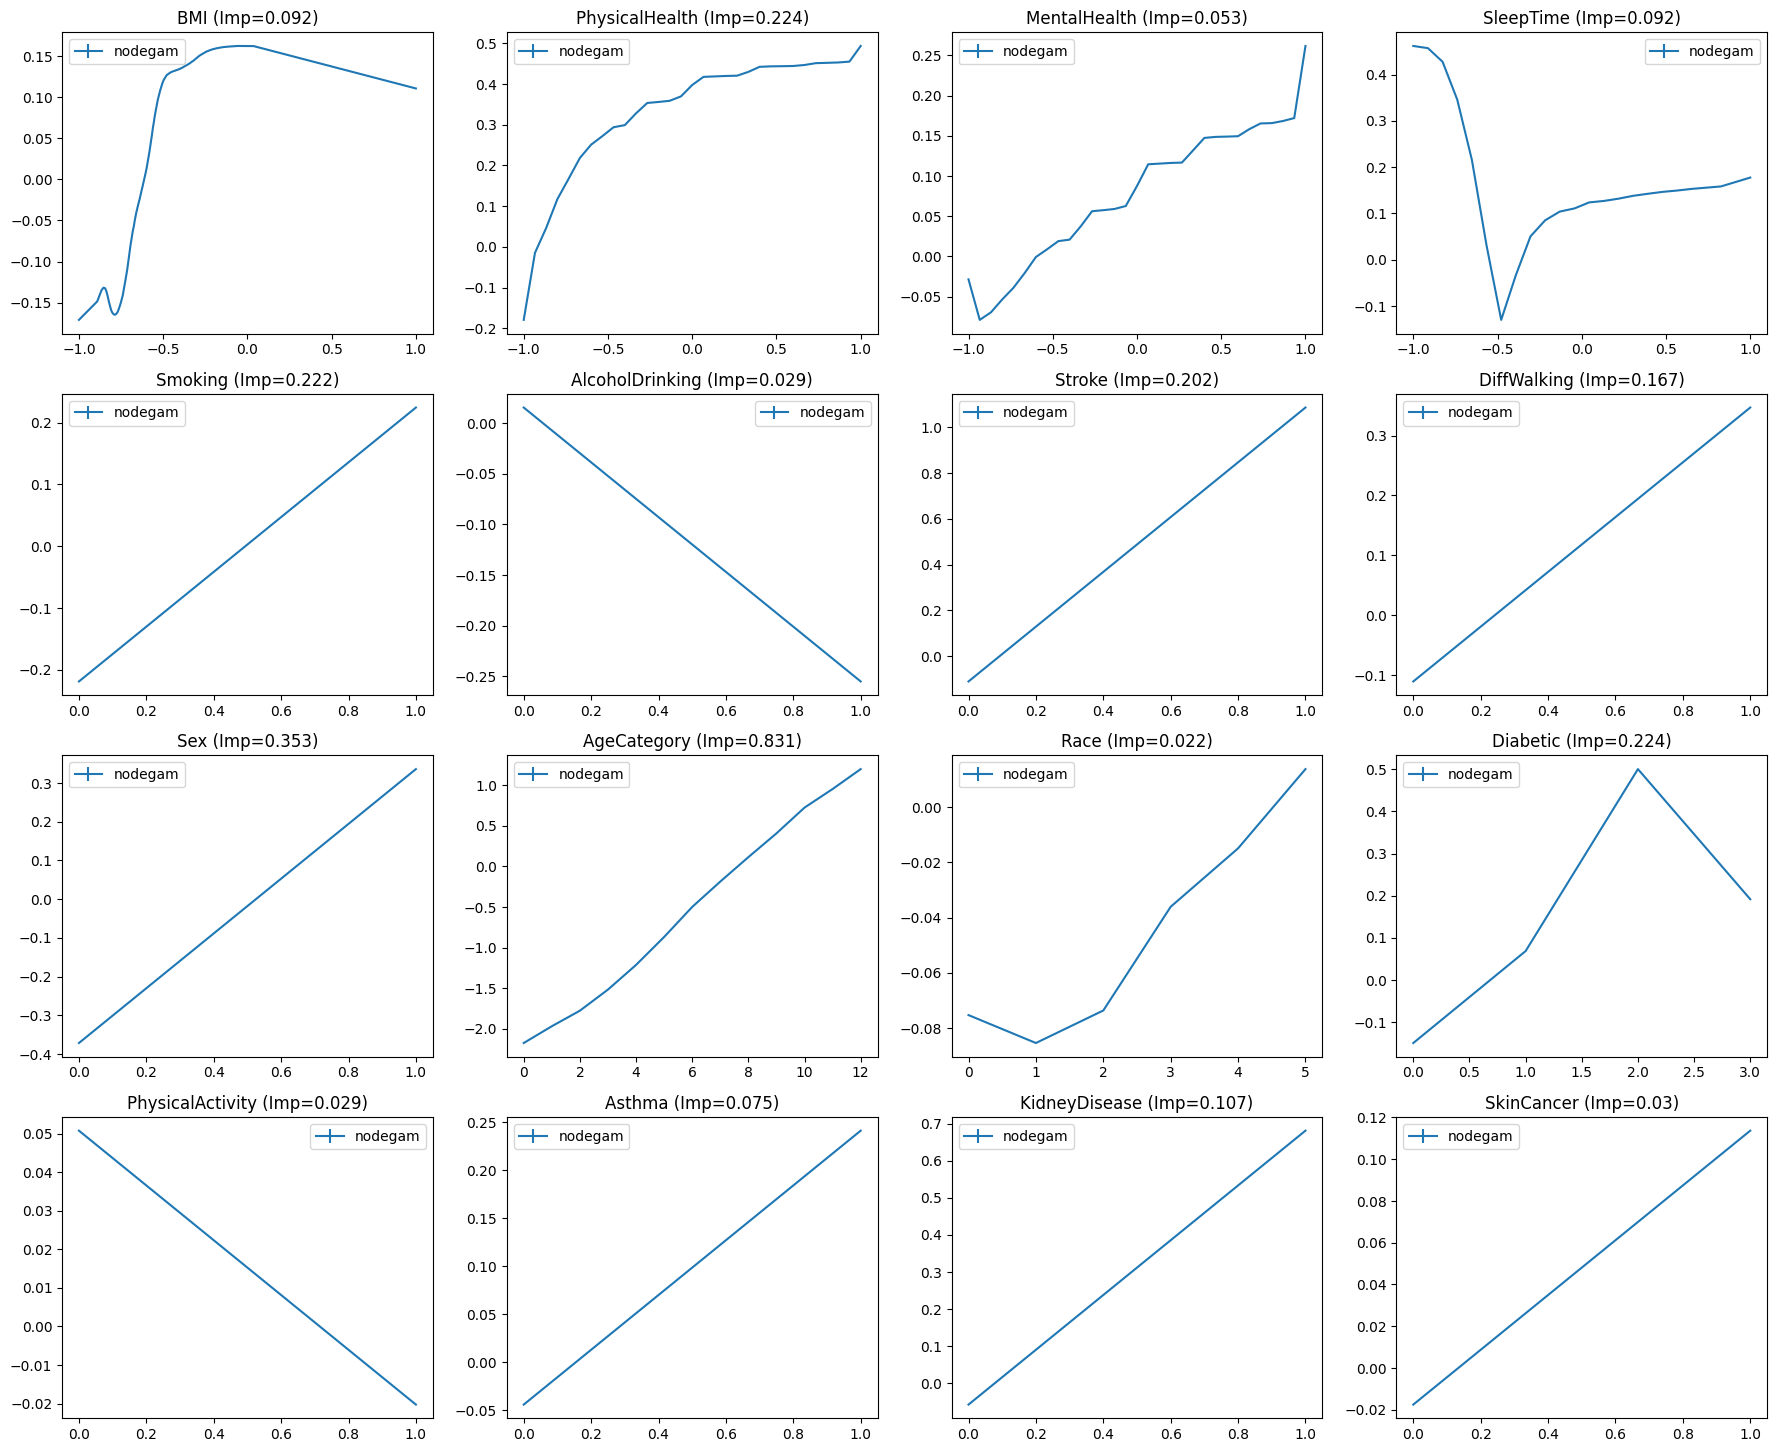

In [10]:
fig, ax = vis_GAM_effects({'nodegam': NodeClass.get_GAM_df(X_train)}, top_interactions=0)


In [75]:
#Age 0.8
#Sex 0.353
visualisation_data = NodeClass.get_GAM_df(X_train)


bin features BMI with uniq val 2432 to only 256


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nodegam/gams/utils.py:154: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:, col_name] = pd.Series(bins)[digitized].values.astype(np.float32)


Finish "Run values through model" in 1.5s


100%|██████████| 16/16 [00:00<00:00, 520.26it/s]


Finish "Extract values" in 44ms
Finish "Purify interactions to main effects" in 0ms
Finish "Center main effects" in 1ms


100%|██████████| 17/17 [00:00<00:00, 10954.55it/s]

Finish "Construct table" in 4ms
Stored 'visualisation_data_heart' (DataFrame)


In [19]:
print(X_train.head())

        BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking  \
0 -0.704593       -0.533333     -0.866667  -0.391304      1.0   
1 -0.528720       -1.000000     -0.866667  -0.478261      0.0   
2 -0.725903       -0.933333     -1.000000  -0.478261      1.0   
3 -0.666626       -1.000000     -0.866667  -0.478261      0.0   
4 -0.490753        1.000000      1.000000  -0.739130      0.0   

   AlcoholDrinking  Stroke  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0              0.0     1.0          1.0  0.0         10.0   5.0       0.0   
1              0.0     0.0          0.0  0.0          7.0   5.0       0.0   
2              0.0     0.0          0.0  0.0          9.0   5.0       0.0   
3              0.0     0.0          0.0  0.0          6.0   5.0       0.0   
4              0.0     0.0          1.0  1.0          7.0   5.0       0.0   

   PhysicalActivity  Asthma  KidneyDisease  SkinCancer  
0               1.0     0.0            0.0         1.0  
1               1.0     0.0     

In [13]:
#set up the nam lines
nam_age_linefit = np.poly1d(np.polyfit(age_data['x'], age_data['y'], 8))
nam_sex_linefit = np.poly1d(np.polyfit(sex_data['x'], sex_data['y'], 8))
nam_diabetic_linefit = np.poly1d(np.polyfit(diabetic_data['x'], diabetic_data['y'], 8))

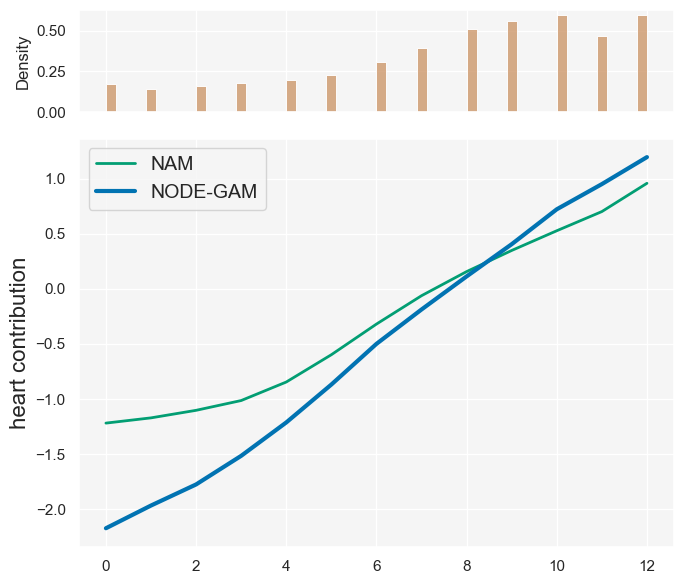

In [69]:
sns.set_theme()
sns.set_style(rc = {'axes.facecolor': 'whitesmoke'})
colorblind_colors = sns.color_palette("colorblind")
age_visualisation = visualisation_data[visualisation_data['feat_name'] == 'AgeCategory']
age_values = np.linspace(X_train['AgeCategory'].min(), X_train['AgeCategory'].max(), len(age_visualisation['y'].iloc[0]))

fig, axes = plt.subplots(2, 
                         1, 
                         figsize=(7, 6),
                         sharex=True,  
                         gridspec_kw=dict(height_ratios = [1, 4])
                    )
axes[1].plot(age_values, nam_age_linefit(age_visualisation['x'].iloc[0]), color = colorblind_colors[2], linewidth = 2, label = 'NAM')
axes[1].plot(age_values, age_visualisation['y'].iloc[0], color = colorblind_colors[0], linewidth = 3, label = 'NODE-GAM')
sns.histplot(X_train['AgeCategory'], ax = axes[0], stat='density', color = colorblind_colors[5])
#plt.xlim(7.8, 15)
#plt.ylim(-1, 1.5)
#plt.xlabel('Age categories (larger is older)', fontsize = 14)
plt.ylabel('heart contribution', fontsize = 16)
plt.legend(fontsize = 14)
plt.tight_layout()
plt.show()


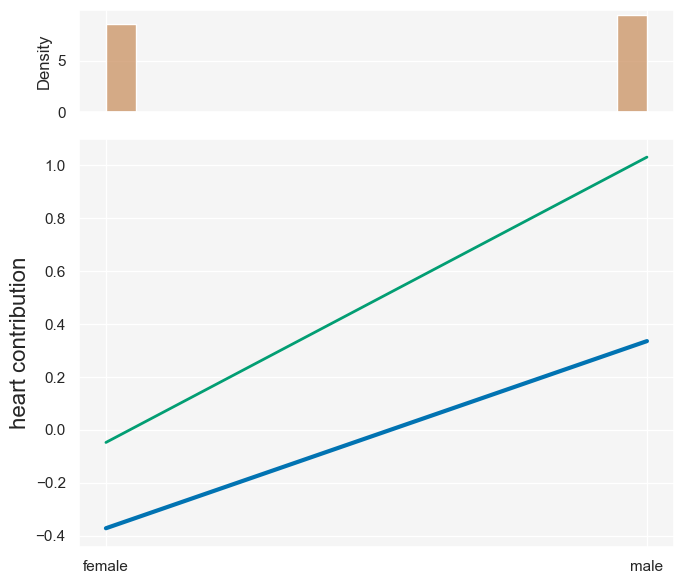

In [70]:
sex_visualisation = visualisation_data[visualisation_data['feat_name'] == 'Sex']
sex_values = np.linspace(X_train['Sex'].min(), X_train['Sex'].max(), len(sex_visualisation['y'].iloc[0]))

fig, axes = plt.subplots(2, 
                         1, 
                         figsize=(7, 6),
                         sharex=True,  
                         gridspec_kw=dict(height_ratios = [1, 4])
                    )
axes[1].plot(['female', 'male'], nam_sex_linefit(sex_visualisation['x'].iloc[0]), color = colorblind_colors[2], linewidth = 2, label = 'NAM')
axes[1].plot(['female', 'male'], sex_visualisation['y'].iloc[0], color = colorblind_colors[0], linewidth = 3, label = 'NODE-GAM')
sns.histplot(X_train['Sex'], ax = axes[0], stat='density', color = colorblind_colors[5])
#plt.xlim(7.8, 15)
#plt.ylim(-1, 1.5)
#plt.xlabel('Sex', fontsize = 14)
plt.ylabel('heart contribution', fontsize = 16)
plt.tight_layout()
plt.show()


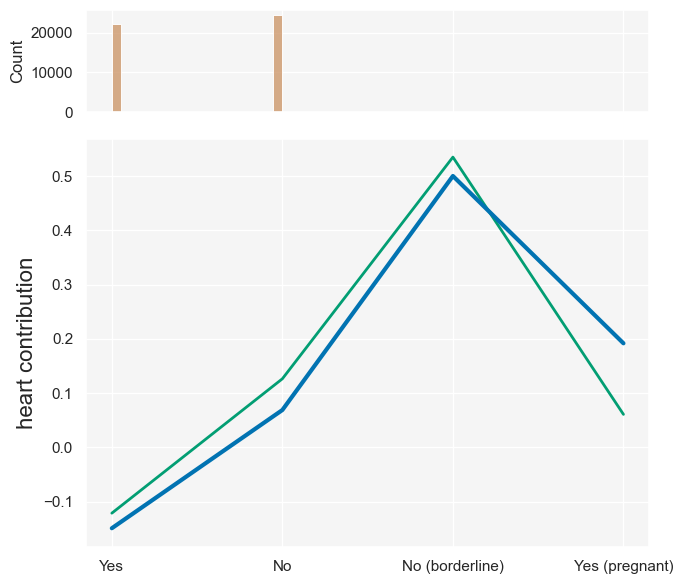

In [71]:
diabetic_visualisation = visualisation_data[visualisation_data['feat_name'] == 'Diabetic']
diabetic_values = np.linspace(X_train['Diabetic'].min(), X_train['Diabetic'].max(), len(diabetic_visualisation['y'].iloc[0]))

fig, axes = plt.subplots(2, 
                         1, 
                         figsize=(7, 6),
                         sharex=True,  
                         gridspec_kw=dict(height_ratios = [1, 4])
                    )
axes[1].plot(['Yes', 'No', 'No (borderline)', 'Yes (pregnant)'], nam_diabetic_linefit(diabetic_visualisation['x'].iloc[0]), color = colorblind_colors[2], linewidth = 2, label = 'NAM')
axes[1].plot(['Yes', 'No', 'No (borderline)', 'Yes (pregnant)'], diabetic_visualisation['y'].iloc[0], color = colorblind_colors[0], linewidth = 3, label = 'NODE-GAM')
sns.histplot(X_train['Sex'], ax = axes[0], stat='count', color = colorblind_colors[5])
#plt.xlim(7.8, 15)
#plt.ylim(-1, 1.5)
#plt.xlabel('Diabetes', fontsize = 14)
plt.ylabel('heart contribution', fontsize = 16)
plt.tight_layout()
plt.show()
